# Exercise set 6: Classification

The main goals of this exercise are to create classifiers and calculate and interpret some performance metrics that can be used to assess the classifiers.

**Learning Objectives:**

After completing this exercise set, you will be able to:

- Create classification models.
- Create and interpret the confusion matrix and use it to evaluate classifier performance.
- Visualise how a decision tree is making its classification.

**To get the exercise approved, complete the following problems:**

- [6.1(b)](#6.1(b)), [6.1(c)](#6.1(c)), [6.1(d)](#6.1(d)), and [6.1(e)](#6.1(e)): To show that you can create a decision tree, plot the confusion matrix and visualise the decision tree itself, and compare classifiers using the confusion matrix.

**Note:** A solution to [Exercise 6.2](#Exercise-6.2) is available online (see Blackboard or [GitHub](https://github.com/andersle/chemometrics/tree/main/exercises/exercise-006)) for those who wish to practice the interpretation aspect ([6.2(b)](#6.2(b)) and [6.2(f)](#6.2(f))) without completing the programming portion.

## Exercise 6.1 Penguins

In this exercise, we will have a look at penguins! We will attempt to figure out the species of penguins based
on their bill length, bill depth, flipper length, and body mass.
The data is from a paper by 
[Gorman, Williams, and Fraser](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)
and can also be found in the R package [palmerpenguins](https://github.com/allisonhorst/palmerpenguins).
Here, we will use a version of the data set [penguins.csv](penguins.csv) where missing
values have been removed and we only have two species of penguins: [Adelie](https://en.wikipedia.org/wiki/Ad%C3%A9lie_penguin) and [Chinstrap](https://en.wikipedia.org/wiki/Chinstrap_penguin).

The image below shows the three islands where these penguins can be found (click the image to make it larger): 
| <a href="penguins.png"><img src="penguins2.png" width="50%"></a>           |
|:-:|
| **Fig. 1** *Location of islands and images of the penguin species.*    |


You will find seven columns in the [penguins.csv](./Data/penguins.csv) data file. Each row is a measurement for
a single penguin for the seven variables found in the columns:


| Column            |  Description                                                        |
|:------------------|--------------------------------------------------------------------:|
| species           | The species (Chinstrap or Adelie)                                   |
| island            | The island where the observation was made (Dream/Torgersen/Biscoe)  |
| bill_length_mm    | (See the illustration below) (measured in mm)                       |
| bill_depth_mm     | (See the illustration below) (measured in mm)                       |
| flipper_length_mm | (See the illustration below) (measured in mm)                       |
| body_mass_g       | The weight of the penguin (in grams)                                |
| sex               | Female/Male                                                         |


| <img src="bill.png" width="50%">                                   |
|:-:|
| **Fig. 2** *Illustration of bill length, bill depth, and flipper length. (The foot is not used in this data set.)*    |

The data can be loaded as follows:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_theme(style="ticks", context="notebook", palette="colorblind")


data = pd.read_csv("penguins.csv")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


### 6.1(a)

**Task: Investigate (by creating figures) if the variables `bill_length_mm`, `bill_depth_mm`,
`flipper_length_mm`, and `body_mass_g` can be used to separate the different
species.**

**Hint:** Several plots can be used to get an overview of the data. For instance, the [scatter plot matrix](https://seaborn.pydata.org/examples/scatterplot_matrix.html), [jointplot](https://seaborn.pydata.org/tutorial/introduction.html#multivariate-views-on-complex-datasets)
from seaborn, or a [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html). Here is one example of how to create the scatter plot matrix:
```python
# To create a scatter plot matrix with seaborn:
grid = sns.pairplot(
    data,
    corner=True,
    hue="species",  # Hue is used to select a column from data to use for colouring
)
```

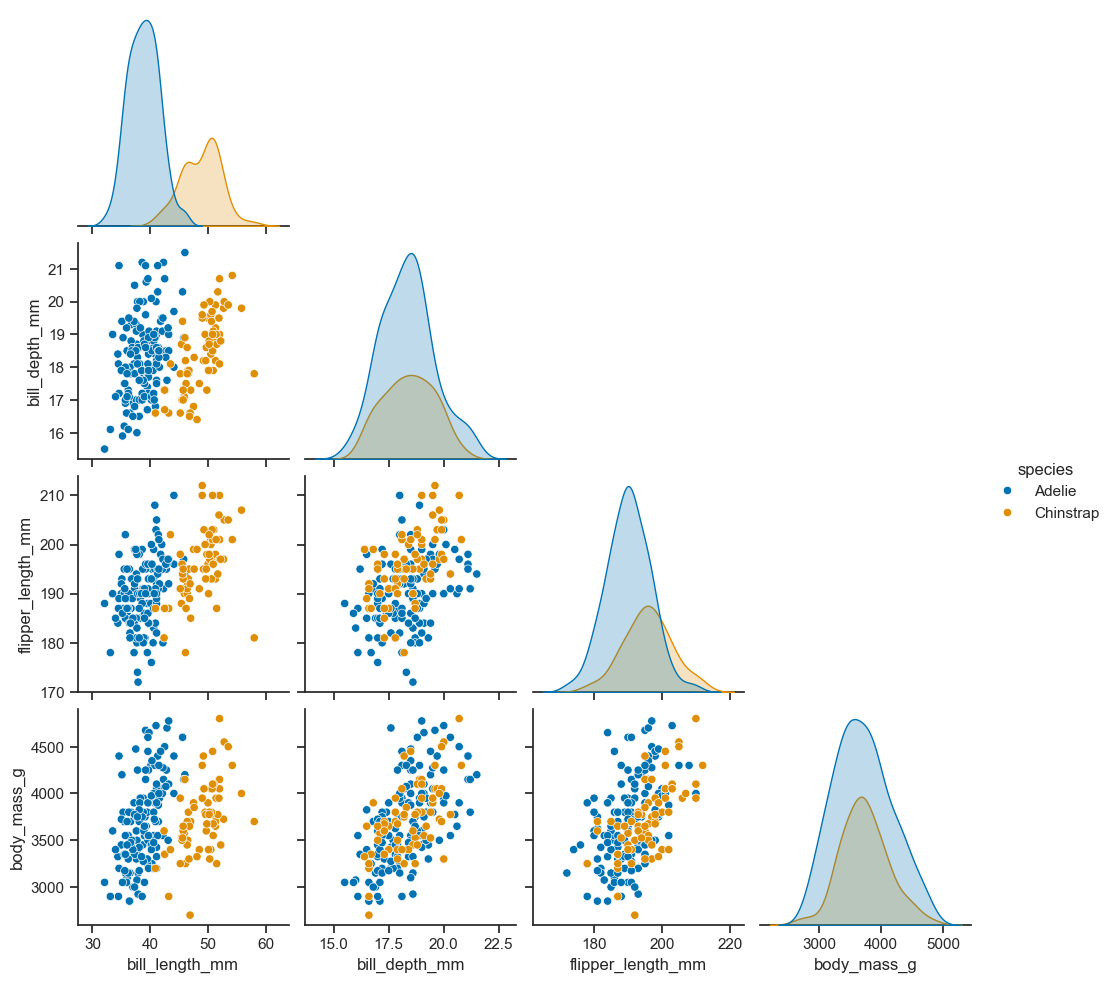

In [11]:
# Your code here
# Create scatter plot matrix with seaborn 
grid = sns.pairplot(
    data,
    corner=True,
    hue="species",  # Hue is used to select a column from data to use for colouring
)

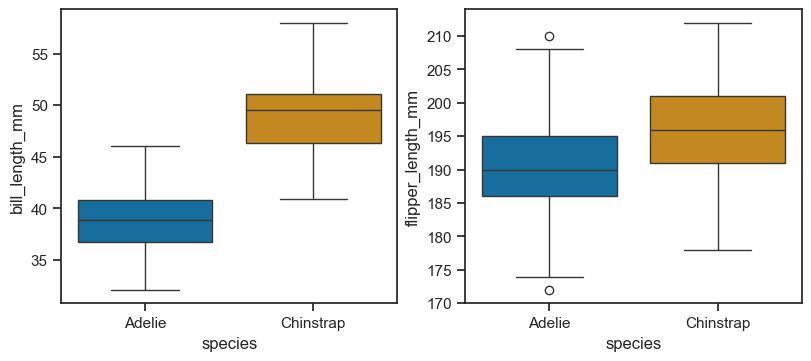

In [15]:
# Create jointplot for two variables with seabron 
#joint = sns.jointplot(
#    data, 
#    x='bill_length_mm', 
#    y='body_mass_g',
#    hue='species', 
#)

fig, (ax1, ax2) = plt.subplots(ncols=2, layout='constrained', figsize=(8,3.5))
# Create boxplot for two variables with seabron 
box = sns.boxplot(
    data, 
    x='species', 
    y='bill_length_mm',
    hue='species', 
    ax=ax1
)
box = sns.boxplot(
    data, 
    x='species', 
    y='flipper_length_mm',
    hue='species', 
    ax=ax2
)

#### Your answer to question 6.1(a): Are there any promising variables that could separate the species?
*Double click here*

*bill_length_mm* and maybe *flipper_length_mm*

### 6.1(b)

**Task: Create a training set and a test set to use to classify the penguin species. What is the fraction of Adelie penguins in the original, test, and training data?**

**Hint:** With scikit-learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), splitting the data can be done with
```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y
)
```
In the example above, we use stratification for the y-values, this is to **ensure that each split** (training and testing) **contains approximately the same proportion of samples from each class as the original dataset**

In [18]:
from sklearn.model_selection import train_test_split

In [ ]:
x_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
y_columns = ['species']

X_df = data.loc[:, x_columns]
X = X_df.to_numpy() 

y_df = data.loc[:, y_columns]
y = y_df.to_numpy() 

In [48]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y, 
    random_state=2025
)

In [51]:
n_adelie_org = data.loc[data['species']=='Adelie', :].shape[0] / len(data)
print(f"Fraction Adelie in org. data:\t {n_adelie_org:.4g}")

n_adelie_train = np.sum(y_train == 'Adelie') / y_train.shape[0]
print(f"Fraction Adelie in train data:\t {n_adelie_train:.4g}")

n_adelie_test  = np.sum(y_test == 'Adelie') / y_test.shape[0]
print(f"Fraction Adelie in test data:\t {n_adelie_test:.4g}")

Fraction Adelie in org. data:	 0.6822
Fraction Adelie in train data:	 0.6813
Fraction Adelie in test data:	 0.6852


#### Your answer to question 6.1(b): What is the fraction of Adelie penguins?
*Double click here*

The fraction og Adelie penguins is ~68%. 

### 6.1(c)

**Task: Create a decision tree classifier to classify the penguin species. Use two levels for the tree and show the confusion matrix for the training and the test set. Is your classifier making any mistakes?**

**Hint:**

1. A decision tree can be created using scikit-learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):
```python
from sklearn.tree import DecisionTreeClassifier

# Create the tree. The parameter max_depth selects the number of levels in the tree
my_first_tree = DecisionTreeClassifier(max_depth=2)

# Train the tree:
my_first_tree.fit(X_train, y_train)
```

2. To show the confusion matrix:
```python
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    my_first_tree,  # The classifier to construct the confusion matrix for.
    X_train,  # The X data.
    y_train,  # The true y data.
    colorbar=True,  # Add a colorbar to show the color scale.
)
```

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [80]:
# Your code here
# Create the tree. The parameter max_depth selects the number of levels in the tree
penguin_tree = DecisionTreeClassifier(max_depth=1)

# Train the tree:
penguin_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

Accuracy:	 92.59%


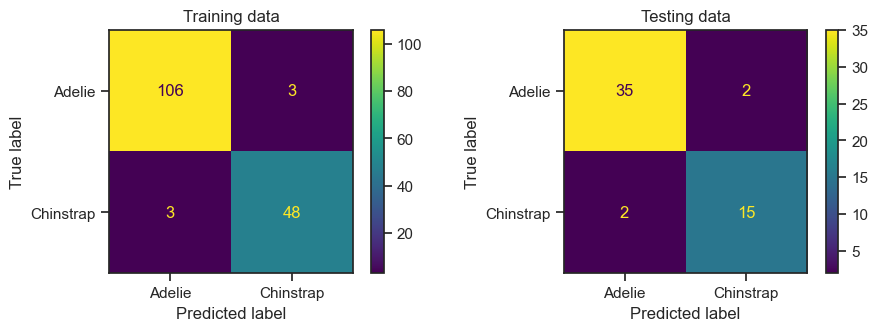

In [81]:
# Plot the confusion matrix:
fig, (ax1, ax2) = plt.subplots(ncols=2, layout='constrained', figsize=(9,3.2))

# Plot for training data 
ConfusionMatrixDisplay.from_estimator(
    penguin_tree, 
    X_train, 
    y_train, 
    colorbar=True, 
    ax=ax1, 
)
ax1.set_title('Training data')

# Plot for test data 
ConfusionMatrixDisplay.from_estimator(
    penguin_tree, 
    X_test, 
    y_test, 
    colorbar=True, 
    ax=ax2, 
)
ax2.set_title('Testing data')

penguin_accuracy = accuracy_score(y_test, penguin_tree.predict(X_test))
print(f"Accuracy:\t {(100*penguin_accuracy):.4g}%")

#### Your answer to question 6.1(c): Is your classifier making any mistakes?
*Double click here*

Yes! 

In the **training** data it is *incorrectly* classifying 
- 3 Adelie as Chinstrap (out of 109, 2.8%)
- 2 Chinstrap as Adelie (out of 51, 3.9%)

In the **testing** data it is *incorrectly* classifying 
- 2 Adelie as Chinstrap (out of 37, 5.4%)
- 2 Chinstrap as Adelie (out of 17, 11.8%)

The Accurace is calculated as the ratio of correct predictions to the total number of predictions 

\begin{equation}
\text{Accuracy} = \frac{35 + 15}{35 + 2 + 2 + 15} = \frac{50}{54} \approx 0.9259
\end{equation}

### 6.1(d)

**Task: Visualise your decision tree and use this to describe how the classification is made.**

**Hint:** The decision tree can be visualized using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) or [export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html),

1. Using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html):

```python
from sklearn import tree

variables = [
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]

tree.plot_tree(
    my_first_tree,  # The tree to plot
    filled=True,  # Add color to the boxes.
    feature_names=variables,  # Get name for variables from the variables list.
    class_names=my_first_tree.classes_,  # Get the name of the different classes from the tree.
)
```

2. Alternative: Using [export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html):

```python
from sklearn.tree import export_graphviz  # To create the tree.
import graphviz  # To turn the three into a graph, you may need to install this (pip install graphviz).
from IPython.display import display  # To show the graph.

dot_data = export_graphviz(
    my_first_tree,  # The tree to plot.
    out_file=None,  # Do not write to file.
    feature_names=variables,  # Get name for variables from the variables list.
    class_names=my_first_tree.classes_,  # Get the name of the different classes from the tree.
    rounded=True,  # Show the boxes in the tree with rounded corners.
    filled=True,  # Add color to the boxes.
)
display(graphviz.Source(dot_data))  # Show the tree in a notebook.
```

In [82]:
from sklearn import tree

C:\Users\haavarug\AppData\Local\Temp\ipykernel_15444\2348079704.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


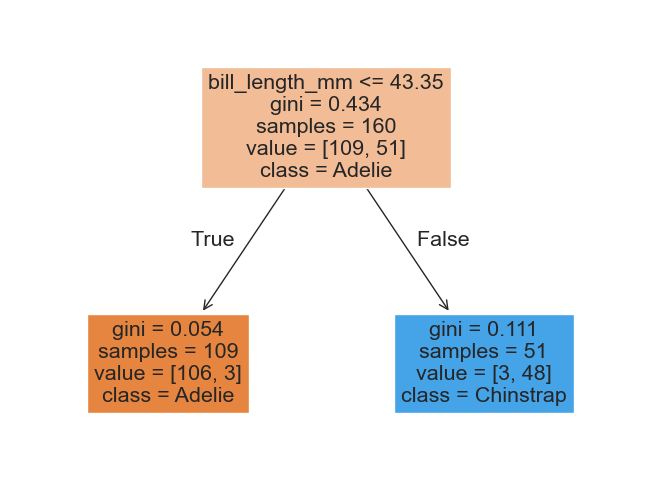

In [83]:
# Your code here
fig, ax = plt.subplots(layout='constrained')
tree.plot_tree(
    penguin_tree,  # The tree to plot
    filled=True,  # Add color to the boxes.
    feature_names=x_columns,  # Get name for variables from the variables list.
    class_names=penguin_tree.classes_,  # Get the name of the different classes from the tree.
    ax=ax, 
)
fig.show()

#### Your answer to question 6.1(d): Describe the decision-making process of your classifier.
*Double click here*



### 6.1(e)

The figure below compares a decision tree classifier to a k-nearest neighbours classifier (using one neighbour) for the test set.

**Task: Use the figure to compare the two classifiers (the left part shows the confusion matrix of the tree classifier applied to the test set, and the right part shows the k-nearest neighbours classifier applied to the same test set). Which one performs best?**

![Compare classifiers](comparecls.png)

**Note:** Your confusion matrix in [6.1(c)](#6.1(c)) may differ from the one shown here since the splitting into a test and training set is randomized.

#### Your answer to question 6.1(e): Which of the two classifiers performs best?
*Double click here*

The *tree classifier* has an accuracy of $\frac{35+15}{35+2+2+15} = 0.9259$

The *k-NN classifier* has an accuracy of $\frac{32+11}{35+2+2+15} = 0.7963$

$\to$ The higher the accuracy the better, and hence the *tree* is better than the *k-NN* classifier. 

## Exercise 6.2

[Schummer *et al.*](https://doi.org/10.1016/S0378-1119(99)00342-X) used microarray technology to analyze the expression of 1536 genes in ovarian cancer and non-cancer tissues. Their primary objective was to identify differentially expressed genes in ovarian cancer versus non-cancer tissues to discover genes with diagnosis potential.

The data file [`ovo.csv`](ovo.csv) contains numerical gene expressions (for 1536 genes) for 54 tissue samples. Each column corresponds to a specific gene, named `X.1`, `X.2`, and so on. Each tissue sample has been classified as non-cancer (`N`) or cancer (`C`) tissue, and these labels can be found in the column `class`. The raw data has been preprocessed by centring each gene expression so that no further preprocessing is needed. The raw data can be loaded as follows:

In [85]:
"""Load the data set."""

import pandas as pd

data_ovo = pd.read_csv("ovo.csv")
classes = data_ovo["class"]  # Classification of samples.
# Turn the class labels into numbers for numeric methods
y_ovo = [1 if i == "C" else 0 for i in classes]
X_ovo = data_ovo.filter(like="X.", axis=1)  # Gene expressions for samples.
data_ovo.head()

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,...,X.1528,X.1529,X.1530,X.1531,X.1532,X.1533,X.1534,X.1535,X.1536,class
0,0.147905,-0.655007,2.131000,-0.000236,0.234855,0.592617,0.076827,-0.389021,-0.968438,0.948742,...,-0.222659,0.111409,0.283782,-0.455201,-0.188230,0.110035,0.043757,-0.496732,-0.232297,N
1,-0.453545,-0.957569,0.115570,0.289271,0.081381,-0.915724,0.007785,-0.154556,-1.125979,0.048278,...,-0.383123,0.007073,0.333707,1.976472,0.368827,0.187440,0.286800,1.193765,0.525628,N
2,-0.453545,-0.864460,-0.233765,1.588062,-0.041476,0.324327,0.254223,-0.476484,-1.019064,0.691584,...,0.068573,-0.791293,0.543426,2.124795,0.201717,0.397475,-0.200866,0.626651,0.776473,N
3,-0.267132,0.223003,0.220267,0.337634,0.532760,-0.488303,0.312640,0.015369,-0.656494,0.299816,...,0.424232,-0.185572,0.303960,1.469754,0.299564,-0.435706,0.485026,1.062236,1.247253,N
4,-0.001671,-0.372607,-0.590699,0.213543,0.646580,-0.469925,-0.255249,-0.432090,-1.019064,0.533704,...,0.052976,-0.227393,0.509074,3.344342,-0.273621,0.470079,0.912197,2.189769,3.261379,N


### 6.2(a)

**Task: Explore the raw data. Do you find genes that appear to show significant differences in expression between non-cancer and cancer tissue?**

**Hint:** You can, for instance, inspect the raw data by running a principal component analysis.

In [152]:
# Your code here
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
scores = pca.fit_transform(X_ovo)
loadings = pca.components_.T
variance = pca.explained_variance_ratio_

Important genes along PC1:
[1531 1125 1307 1526 1160  693   93 1117  539 1491]


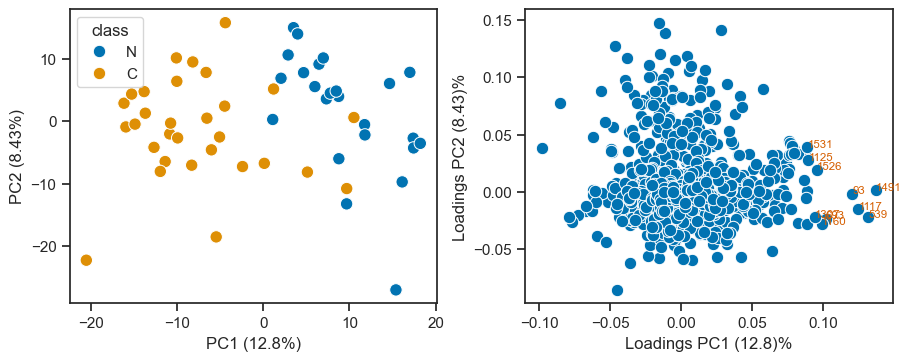

In [170]:
fig, (axS, axL) = plt.subplots(ncols=2, layout='constrained', figsize=(9,3.5))

# Plot scores 
sns.scatterplot(data_ovo, x=scores[:,0], y=scores[:,1], 
                s=80, hue='class', palette='colorblind', 
                ax=axS)
axS.set(xlabel=f"PC1 ({(100*variance[0]):.3g}%)", 
        ylabel=f"PC2 ({(100*variance[1]):.3g}%)")

# Plot loadings 
sns.scatterplot(x=loadings[:,0], y=loadings[:,1], 
                s=80, 
                ax=axL)
axL.set(xlabel=f"Loadings PC1 ({(100*variance[0]):.3g})%", 
        ylabel=f"Loadings PC2 ({(100*variance[1]):.3g})%")
most_important_idxs = np.argsort(loadings[:,0])[-10:] #Note: idx = gene# - 1
for idx, variable in enumerate(X_ovo.columns): #n, X.n+1
    if idx in most_important_idxs: #)n in ['X.n']) -> True
        axL.text(loadings[idx,0], loadings[idx,1], 
                 variable[2:], #'X.gene' -> 'gene'
                 color='C3', fontsize='x-small')

most_important_genes = most_important_idxs + 1
print(f"Important genes along PC1:\n{most_important_genes}")

Text(34.875, 0.5, 'Gene expression for 93')

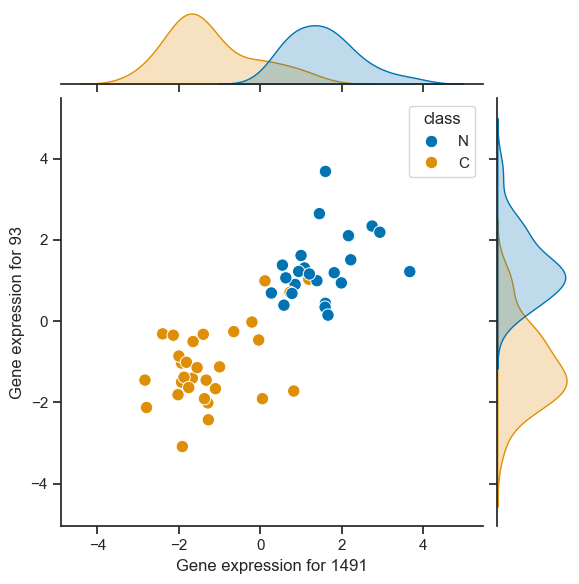

In [182]:
gene1 = most_important_genes[-1] 
gene2 = most_important_genes[6] #6,7
grid = sns.jointplot(
    data=data_ovo,
    x=f"X.{gene1}",
    y=f"X.{gene2}",
    hue="class",
    s=80,
)
ax = grid.figure.axes[0]
ax.set_xlabel(f"Gene expression for {gene1}")
ax.set_ylabel(f"Gene expression for {gene2}")

#### Your answer to question 6.2(a): Did you find any promising genes?
*Double click here*

See above print statemnt and plot for promising genes along PC1. 

### 6.2(b)

**Task: In the following task, you will develop a classifier to predict whether a tissue sample is cancerous or non-cancerous based on gene expression data. Which error type (false positive or false negative) should be minimised?**

#### Your answer to question 6.2(b): Will you minimise false positives or negatives?
*Double click here*

We should prioritize to minimize *false negative*, i.e., failing to give treatment to some who has cancer. 

### 6.2(c)

**Task: Create a decision tree classifier to classify tissue type from the gene expressions. Optimize the tree depth using cross-validation on a training set. Report the optimal maximum depth of the resulting tree.**

With reference to the previous problem:

* If you prioritised minimising false positives, use the `precision` as your optimisation metric.
* If you prioritised minimising false negatives, use the `recall` as your optimisation metric.
* If you opted for a balanced approach, use the `balanced_accuracy` as your optimisation metric.


**Hint:**

1. The optimisation of the decision tree can be done as follows (assuming that you have already split into the training and test sets):

```python
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Set up a grid search:
parameters = {"max_depth": range(1, 10)}
grid = GridSearchCV(
    DecisionTreeClassifier(),
    parameters,
    scoring="recall",  # Swap this with the metric you prefer
)
# Run the grid search:
grid.fit(X_train, y_train)

# Get the best classifier from the grid search:
best_tree = grid.best_estimator_
print("Best tree:", best_tree)
print("Best score", grid.best_score_)
print("Best parameters", grid.best_params_)
```

#### Your answer to question 6.2(c): What depth did you get for your tree?
*Double click here*

In [265]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [278]:
#X_ovo_array = X_ovo.to_numpy()
#y_ovo_array = np.array(y_ovo).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(
    X_ovo,
    y_ovo,
    stratify=classes, #y_ovo 
    test_size=0.33, 
    random_state=2025
)

In [279]:
# Optimizing decision tree 

# Set up a grid search:
parameters = {"max_depth": range(1, 10)}
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=2025),
    parameters,
    scoring="recall",  # Use recall to minimize false negatives
)

# Run the grid search:
grid.fit(X_train, y_train)

# Get the best classifier from the grid search:
best_tree = grid.best_estimator_
print("Best tree:", best_tree)
print("Best score", grid.best_score_)
print("Best parameters", grid.best_params_)

Best tree: DecisionTreeClassifier(max_depth=2, random_state=2025)
Best score 0.9
Best parameters {'max_depth': 2}


### 6.2(d)

**Task: Create a k-nearest neighbours classifier to classify tissue type from the gene expressions. Optimize the number of neighbours using cross-validation on a training set. Report the optimal number of neighbours.**

**Hint:**

1. The optimisation of the k-nearest neighbours classifier can be done as follows (assuming that you have already split into the training and test sets):

```python
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Set up a grid search:
parameters = {"n_neighbors": range(1, 15)}
grid = GridSearchCV(
    KNeighborsClassifier(),
    parameters,
    scoring="recall",  # Swap this with the metric you prefer
)
# Run the grid search:
grid.fit(X_train, y_train)

# Get the best classifier from the grid search:
best_knn = grid.best_estimator_
print("Best knn:", best_knn)
print("Best score", grid.best_score_)
print("Best parameters", grid.best_params_)
```

In [280]:
from sklearn.neighbors import KNeighborsClassifier

In [282]:
# Your code here
# Optimizing k-NN 

# Set up a grid search:
parameters = {"n_neighbors": range(1, 15)}
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    parameters,
    scoring="recall",  # Use recall to minimize false negatives
)

# Run the grid search:
grid_knn.fit(X_train, y_train)

# Get the best classifier from the grid search:
best_knn = grid_knn.best_estimator_
print("Best knn:", best_knn)
print("Best score", grid_knn.best_score_)
print("Best parameters", grid_knn.best_params_)

Best knn: KNeighborsClassifier(n_neighbors=11)
Best score 0.85
Best parameters {'n_neighbors': 11}


#### Your answer to question 6.2(d): What was the optimal number of neighbours?
*Double click here*

### 6.2(e)

**Task: Create a random forest classifier to classify tissue type from the gene expressions. Optimize the number of trees and levels using cross-validation on a training set. Report the optimal number of trees and levels.**

**Hint:**

1. The optimisation of the random forest classifier can be done as follows (assuming that you have already split into the training and test sets):

```python
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Set up a grid search:
parameters = {
    "n_estimators": [10, 50, 100, 200, 500],  # the number of trees
    "max_depth": range(1, 11),  # the maximum depth
}
grid = GridSearchCV(
    RandomForestClassifier(),
    parameters,
    scoring="recall",  # Swap this with the metric you prefer
    verbose=2,  # Print out text to show the progress of the fitting
)
# Run the grid search:
grid.fit(X_train, y_train)

# Get the best classifier from the grid search:
best_forest = grid.best_estimator_
print("Best forest:", best_forest)
print("Best score", grid.best_score_)
print("Best parameters", grid.best_params_)
```

In [270]:
from sklearn.ensemble import RandomForestClassifier

In [285]:
# Your code here

# Set up a grid search:
parameters = {
    "n_estimators": [10, 50, 100, 500],  # the number of trees
    "max_depth": range(1, 10),  # the maximum depth
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=2025),
    parameters,
    scoring="recall",  # Swap this with the metric you prefer
    verbose=2,  # Print out text to show the progress of the fitting
)
# Run the grid search:
grid.fit(X_train, y_train)

# Get the best classifier from the grid search:
best_forest = grid.best_estimator_
print("Best forest:", best_forest)
print("Best score", grid.best_score_)
print("Best parameters", grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=1, n_e

#### Your answer to question 6.2(e): What was the optimal number of estimators and tree depth?
*Double click here*

### 6.2(f)

**Task: Compare the three optimised classifiers you have made by applying them to the test set and obtaining the corresponding confusion matrices. Also compute the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), and the [balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) for the test set. Which classifier performs best?**



**Hint:** The metrics can be computed as follows:
```python
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (
    recall_score,
    precision_score,
    balanced_accuracy_score,
)

y_hat = best_tree.predict(X_test)
recall_tree = recall_score(y_test, y_hat)
precision_tree = precision_score(y_test, y_hat)
bac_tree = balanced_accuracy_score(y_test, y_hat)
print(f"Recall: {recall_tree:.3f}")
print(f"Precision: {precision_tree:.3f}")
print(f"Balanced accuracy: {bac_tree:.3f}")

ConfusionMatrixDisplay.from_estimator(
    best_tree,
    X_test,
    y_test,
    colorbar=True,
)
```

In [286]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (
    recall_score,
    precision_score,
    balanced_accuracy_score,
)

In [300]:
# Your code here

# Initiate arrays to store quality measures 
classifiers = ['tree', 'knn', 'forest']

best_classifier = {key: None for key in classifiers}
precision       = {key: None for key in classifiers} 
recall          = {key: None for key in classifiers} 
bac             = {key: None for key in classifiers} 

# Set up loop inputs for each classifier 
classifier_objects = {'tree'   : DecisionTreeClassifier(random_state=2025), 
                      'knn'    : KNeighborsClassifier(), 
                      'forest' : RandomForestClassifier(random_state=2025),
                      }
classifier_parameters = {'tree' : {"max_depth" : range(1, 10)}, 
                          'knn' : {"n_neighbors" : range(1, 15)}, 
                          'forest' : {
                              "n_estimators" : [10, 50, 100, 500], 
                              "max_depth"    : range(1, 10),
                              },
                         }

# Run loop 
for i, classifier in enumerate(classifiers): 
    classifier_obj   = classifier_objects[classifier]
    classifier_param = classifier_parameters[classifier]
    
    grid = GridSearchCV(
        classifier_obj,
        classifier_param,
        scoring="recall",  # Swap this with the metric you prefer
    )
    # Run the grid search:
    grid.fit(X_train, y_train)

    # Get the best classifier from the grid search:
    best_tree = grid.best_estimator_
    best_classifier[classifier] = best_tree 

    # Do predictions 
    y_hat = best_tree.predict(X_test)
    # Compute quality measures and store them 
    precision_tree = precision_score(y_test, y_hat)
    precision[classifier] = precision_tree 
    recall_tree = recall_score(y_test, y_hat)
    recall[classifier] = recall_tree
    bac_tree = balanced_accuracy_score(y_test, y_hat)
    bac[classifier] = bac_tree


In [301]:
precision

{'tree': 0.7777777777777778, 'knn': 1.0, 'forest': 0.9}

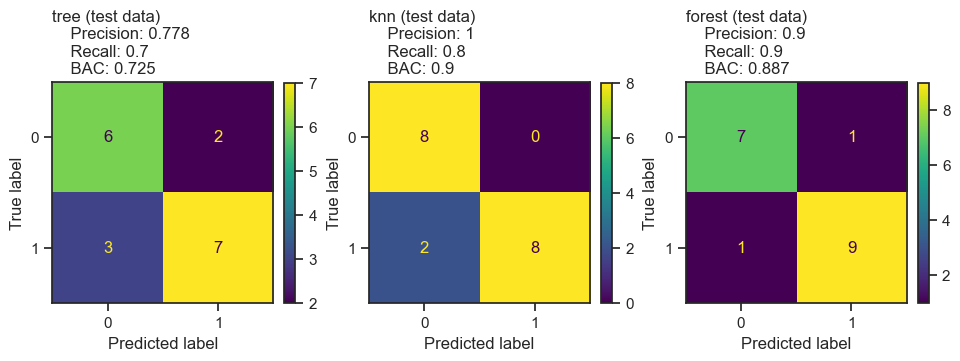

In [320]:
# Plot confusion matrix for each classifiers 

fig, axs = plt.subplots(ncols=3, figsize=(9.5,3.5), layout='constrained') 

for i, classifier in enumerate(classifiers): 
    ConfusionMatrixDisplay.from_estimator(
    best_classifier[classifier],
    X_test,
    y_test,
    colorbar=False,
    ax=axs.flat[i]
    )
    title_txt = f"{classifier} (test data)\n\
    Precision: {precision[classifier]:.3g}\n\
    Recall: {recall[classifier]:.3g}\n\
    BAC: {bac[classifier]:.3g}"
    axs.flat[i].set_title(title_txt, loc='left')
    fig.colorbar(axs.flat[i].images[0], ax=axs.flat[i], shrink=0.75)

#### Your answer to question 6.2(f): Which classifier performs best?
*Double click here*

From the above figure we see that either the *random forest* (if we highlight recall) or the *knn* (if we highlight overall performance) classifier performs best. 

## Your feedback for Exercise 6

1. **Time & Difficulty:**
* Length (1=too short, 5=too long): 1  2  3  4  5
* Difficulty (1=too easy, 5=too difficult): 1  2  3  4  5
* Most challenging part: ________________________

2. **Code Examples:**
* More or less example code?  More  Less  About Right
* Areas where more examples would be helpful: ________________________

3. **Errors/Inconsistencies:** Did you encounter any?  Yes  No  If yes, please describe: ________________________
    
4. **Suggestions:** How could this exercise be improved? ________________________